# Lab 3: Supervised learning

This lab shows how to run simple classification models using the scikit-learn library. In this lab, you will learn how to build different classification models on a given training set and then apply them to predict the classes on a test set. This lab will also show you how to derive accuracy from the test set, one of the most famous performance measures.

### Contents
- 3-1. Supervised learning models using scikit-learn
  - Perceptron
  - K-nearest neighbors
  - Decision tree
  - Support vector machines

- 3-2. Manual implementation
  - Perceptron
  - K-nearest neighbors

## 3-1. Supervised learning models  using scikit-learn 

You may already know basic concepts of scikit-learn from the previous labs. We will keep the same format, but now our task is **supervised learning**, which means we now deal with the datasets with answers.

To use scikit-learn, we do not need to rely on Python syntaxes such as functions or classes; instead, we load and call the methods provided by the library directly on the console.
We will use **Connectionist Bench** from the UCI Machine Learning Repository, which can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data). We already located the dataset into **datasets** directory, so you can also include it from there. This dataset has two classes: ***Mines*** and ***Rocks***, with 60 attributes representing each data entity. More information can be found [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)).

#### Load the libraries

These are the essential libraries used throughout this lab session. A random seed ensures the same results as the instructor's.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 12345

#### Load the data

The first thing you need to do is to load the data and check if it's correctly loaded. We will use a simple pandas method called **read_csv** to load datasets with a unique separator such as comma (,) or tab (   ). Since there is no header of the table in the dataset, you need to choose not to use the first row as a set of column names. 

* The dataset is located in the **datasets** directory and its name is **sonar.all-data**.

* header parameter should be provided.

In [48]:
data = pd.read_csv("sonar.all-data", header = None)

In [49]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


You can always check whether the shape of data by looking at the first five rows using the **head** method.

* DataFrame.head()

In [50]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


You can also check the null values. You can use .info() that you learned from the previous labs.

* DataFrame.info()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

There is also an isnull() function to check nulls in the dataframe.

* isnull().sum() will return column-wise summation of `True`s.
* isnull().sum().sum() will finally return how many nulls are in the dataset.

In [55]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [52]:
data.isnull().sum().sum()

0

Our dataframe has attributes (0-59) and labels (60) together. However, scikit-learn requires that labels and data attributes should be separated. Let's separate the data labels from the dataset.

In [67]:
X = data.drop(60, axis=1)

In [68]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [75]:
y = data.iloc[:, -1]
#y = data[60]

In [76]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

Next, we will split the dataset into training and test sets. Since we will not apply any validation strategy, such as k-fold cross-validation, splitting the whole dataset into two sets will be enough.

To do this, we can manually pick some part of the data to create two different subsets. However, scikit-learn also provides one method for this job. We will use the **train_test_split** function in scikit_learn in the **model_selection** package.

In [86]:
from sklearn.model_selection import train_test_split

This method divides the entire dataset into training and test sets. To do this, we need to specify the required parameters, such as our data attributes (X) and labels (y) and what percent we want to have for the test set (test_size). This method also has optional parameters such as 1) whether we want to allow shuffling (shuffle), 2) random state (random_state), or 3) whether we want to keep the label's proportions when we divide the data (stratify).

Here, we will divide the training and test sets with a 70:30 ratio.

* Specify X, y, test_size, random_state, stratify

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [89]:
y_train

103    M
192    M
181    M
123    M
53     R
      ..
132    M
59     R
167    M
119    M
87     R
Name: 60, Length: 145, dtype: object

In [90]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0137,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0185,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007
181,0.0423,0.0321,0.0709,0.0108,0.1070,0.0973,0.0961,0.1323,0.2462,0.2696,...,0.0367,0.0176,0.0035,0.0093,0.0121,0.0075,0.0056,0.0021,0.0043,0.0017
123,0.0270,0.0163,0.0341,0.0247,0.0822,0.1256,0.1323,0.1584,0.2017,0.2122,...,0.0197,0.0189,0.0204,0.0085,0.0043,0.0092,0.0138,0.0094,0.0105,0.0093
53,0.0293,0.0378,0.0257,0.0062,0.0130,0.0612,0.0895,0.1107,0.0973,0.0751,...,0.0076,0.0065,0.0072,0.0108,0.0051,0.0102,0.0041,0.0055,0.0050,0.0087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0968,0.0821,0.0629,0.0608,0.0617,0.1207,0.0944,0.4223,0.5744,0.5025,...,0.0206,0.0073,0.0081,0.0303,0.0190,0.0212,0.0126,0.0201,0.0210,0.0041
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0019,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058
167,0.0137,0.0297,0.0116,0.0082,0.0241,0.0253,0.0279,0.0130,0.0489,0.0874,...,0.0169,0.0081,0.0040,0.0025,0.0036,0.0058,0.0067,0.0035,0.0043,0.0033
119,0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,...,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023


In [88]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
161,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0271,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,...,0.0071,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0199,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018
102,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0215,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124
13,0.0090,0.0062,0.0253,0.0489,0.1197,0.1589,0.1392,0.0987,0.0955,0.1895,...,0.0187,0.0059,0.0095,0.0194,0.0080,0.0152,0.0158,0.0053,0.0189,0.0102


#### Perceptron

The first algorithm we are going to make is **Perceptron**. Perceptron is a binary classifier having one weight (w) and one bias (b) value $w∙x+b$. You can also regard it as a single-neuron classifier.

* Scikit-learn has perceptron as its built-in function.

**Perceptron** is in the linear_model package of scikit_learn.

In [91]:
from sklearn.linear_model import Perceptron

We first need to make an instance by calling a class **Perceptron**to perform analysis. It receives a few parameters, which can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Since we are trying to run the simplest perceptron, we can put some of the parameters scikit-learn supports. We will not use any regularization or early-stopping here, but we still need to consider some parameters.

- max_iter: Perceptron can converge or cannot converge; it depends on the dataset. We can at least set some reasonable maximum iteration.
- fit_intercept: Perceptron can have intercept (or bias) value. You can state it here (True/False; default=True).
- tol: Since perceptron cannot converge forever, we can state a stopping criterion. The iteration will stop when loss > previous_loss - tol.
- shuffle: We can shuffle the training data with each iteration.

You can first create our instance with the following options:

* maximum iteration = 100.
* without shuffling.
* without a tol value.

In [92]:
ppn = Perceptron(max_iter=100, tol=None, shuffle = False)

Since we already have prepared our training data (X_train, y_train), we can call **fit** function with those variables.

In [93]:
ppn.fit(X_train, y_train)

Perceptron(max_iter=100, shuffle=False, tol=None)

Now, our model has trained its weights and bias, and this information is stored in our instance **ppn**. We can get a *test error* on our test set by calling the **score** method and check the predicted labels by calling the **predict** method.

In [13]:
ppn.score(X_test, y_test)

0.6825396825396826

In [94]:
ppn.predict(X_test)

array(['R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M'], dtype='<U1')

If we set the **tol** parameter, the algorithm might finish earlier than our maximum iteration. We can also check it as it is stored in *n_iter_* variable in our instance.

In [95]:
ppn.n_iter_

100

In [102]:
ppn = Perceptron(max_iter=100, tol=0.1, shuffle = False)
ppn.fit(X_train, y_train)
ppn.n_iter_

14

#### K-nearest neighbors

The following algorithm we will try is k-nearest neighbors (kNN). In scikit-learn, all methods and processes we need are entirely the same. The only change is when we create an instance because different models will have other parameters. We can find kNN in the **neighbors** package of scikit-learn.

In [103]:
from sklearn.neighbors import KNeighborsClassifier

kNN is a simple algorithm having a small number of parameters. Detailed information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). However, we will only focus on the number of neighbors now as it is a critical factor of the algorithm's performance. We can do some experiments by changing the parameters. Besides that, you can also change the distance function from Euclidean to something else (p), and you can put more weight on the closest neighbor if the case is the numerical prediction (weights). Supported distance measures and other parameter information can be found on the official page.

* Create a new instance of KNeighborsClassifier with n_neighbors=3

In [104]:
neigh = KNeighborsClassifier(n_neighbors=3)

After making the instance, we can train and test our algorithm in the same way as Perceptron. We can use **fit** for training, **score** to get test accuracy, and **predict** to get the predicted labels of the test dataset.
- Fit the classifier to `X_train` and `y_train`.

In [105]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Return a classification score of the trained model on `X_test` and `y_test`.

In [106]:
neigh.score(X_test, y_test)

0.8253968253968254

- Print predicted labels of `X_test`.

In [107]:
neigh.predict(X_test)

array(['R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R'],
      dtype=object)

#### Decision tree

Let's deal with the **decision tree**. When running a decision tree using scikit-learn, the process after creating an instance is the same as other classifiers. Therefore, the most important thing is understanding the parameters for each model to create a new instance. You can find a standard decision tree in the **tree** package.

In [108]:
from sklearn.tree import DecisionTreeClassifier

To create one decision tree instance, we do not need to put any parameter as DecisionTreeClassifier has default options for every parameter it has. The parameters constrain the tree by limiting the maximum depth or minimum samples to split. There is no optimal set of parameters that can be applied to all cases, so we may need to optimize it by running further optimization techniques such as *grid search*, which we will look into in the next lab. Here, we will use a standard decision tree without specifying any parameter. Due to its randomness inside, we still need to state a random state.

- Create a new instance of DecisionTreeClassifier with random_state=RANDOM_SEED

In [110]:
dtc = DecisionTreeClassifier(random_state = RANDOM_SEED)

After making the instance, we can train and test our algorithm in the same way as Perceptron. We can use **fit** for training, **score** to get test accuracy, and **predict** to get the predicted labels of the test dataset.

- Fit the classifier to `X_train` and `y_train`.

In [111]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

- Return a classification score of the trained model on `X_test` and `y_test`.

In [112]:
dtc.score(X_test, y_test)

0.746031746031746

- Print predicted labels of `X_test`.

In [113]:
dtc.predict(X_test)

array(['R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M'],
      dtype=object)

#### Support vector machines

Scikit-learn offers a variety of support vector machine algorithms: SVC, NuSVC, and LinearSVC. SVC is a basic form of support vector machine supporting various kernels, while LinearSVC forms a linear boundary without a kernel (You can find more [here](https://scikit-learn.org/stable/modules/svm.html)). NuSVC is similar to SVC, but the biggest feature of it is that we can adjust the number of support vectors. All three classifiers are available in the **SVM** package, and we will use SVC in this lab.

In [116]:
from sklearn.svm import SVC

**SVC** has a lot of parameters, similar to the decision tree we have seen earlier. Many parameters are used to fine-tune the model. One important parameter here is **C**, a regularization factor. This value is an indicator of how much the training set of the SVM can cover. The larger the C, the smaller the SVM's margin area, which means that the training set's fitting ability to the training set becomes stronger than before. Therefore, finding C that can give the right regularization level is important.

We can plot the iris dataset by differing C. This lab includes a function from the scikit-learn user guide website, which shows the decision boundary of an SVC model. We can try to apply various C values and see the difference.

- Please import **plot_iris** function by running this block below.

In [117]:
from plot_iris import plot_iris

You can freely change the value of C and see differences.

C:\Users\achyu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


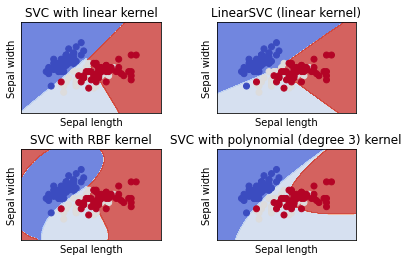

In [124]:
plot_iris(C=1)

C:\Users\achyu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


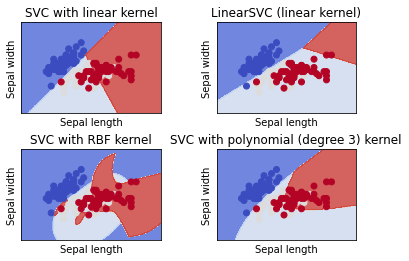

In [125]:
plot_iris(C=10000)

Now, we can apply SVM to our dataset. There are many available kernels that scikit-learn supports, but we will use the RBF kernel, set as a default in scikit-learn. We will be able to deal with other kernels in the upcoming assignment.

In [126]:
svc = SVC()

- Fit the classifier to `X_train` and `y_train`.

In [127]:
svc.fit(X_train, y_train)

SVC()

- Return a classification score of the trained model on `X_test` and `y_test`.

In [128]:
svc.score(X_test, y_test)

0.7777777777777778

- Print predicted labels of `X_test`.

In [130]:
svc.predict(X_test)

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M'],
      dtype=object)

You can change C and see the difference in the test score.

In [139]:
svc2 = SVC(C = 11)
svc2.fit(X_train, y_train)
svc2.score(X_test, y_test)

0.8888888888888888

When we give too much space for the margin, SVM can be underfitted and lose enough classification power. Too much generalization cannot always be good.

In [132]:
svc3 = SVC(C = 0.1)
svc3.fit(X_train, y_train)
svc3.score(X_test, y_test)

0.5396825396825397

## 3-2. Manual implementation

Now it is time to implement some algorithms we tried in this lab manually. It will give you a more robust understanding of the algorithm. We are going to implement simple ones: **perceptron** and **kNN**.

In those implementations, we use the **class** notation and **self** variables inside. This structure is made to give you the same experience with scikit-learn when testing. You only use **self** here to call the methods defined in the class structure or to access the class variable defined by self inside the class. The class-based structure will not appear in the assignment.

#### Perceptron

Before implementing perceptron, we need to change the letter classes into numbers as perceptron assumes that it receives binary numeric classes.

In [154]:
y_train_numeric = y_train.replace(['M', 'R'], [0, 1])
y_test_numeric = y_test.replace(['M', 'R'], [0, 1])

Here we already have a basic structure of our new perceptron classifier! It has the same structure with scikit-learn's one, so we can test our model in the same way as perceptron in Pandas after finishing the development.

In [163]:
ab=pd.DataFrame({"A":[10,30],"B":[20,50]})

In [164]:
ab

,A,B
0,10,20
1,30,50


In [165]:
for idx, row in ab.iterrows():
    print(idx,row)

0 A    10
B    20
Name: 0, dtype: int64
1 A    30
B    50
Name: 1, dtype: int64


In [155]:
class Perceptron():
    
    def __init__(self, max_iter):
        """
        A constructor that receives parameters and save them into member variables.
        You will receive max_iter value and need to save into self.max_iter.

        Input:
          max_iter: The maximum iteration of the algorithm.
        Output:
          None.
        """
        self.max_iter = max_iter
    
    
    def fit(self, X, y):
        """
        A method to train the model by receiving the training dataset and labels.
        
        Input:
          X: Training dataset.
          y: Training labels.

        Output:
          None."""    
        #- Step 1: The algorithm needs to set an empty list of size |attributes|+1 to save our weights (vector w) and bias (b).
        #          The additional value is used for intercept (or bias) value of the perceptron classifier.
        
        #self.w = None
        self.w = np.zeros(len(X.iloc[0])+1)
        
        #- Step 2: The algorithm iterates self.max_iter times and train the model.
        #for _ in range(None):
        
        #prediction = self.predict(row) predicts the output based on the current weights and the input row.
        #error = y[idx] - prediction calculates the error for the current data point. Here, 
        #y[idx] is the true label for that data point.
        #loss += error accumulates the error for this iteration.
        #self.w[0] = self.w[0] + error updates the bias term based on the error.
        #self.w[1:] = self.w[1:] + error * row updates the weights associated with
        #each feature based on the error and the feature values.
        
        for it in range(self.max_iter):
            loss = 0
            
            for idx, row in X.iterrows():
                prediction = self.predict(row)
                error = y[idx] - prediction
                loss += error
                
                self.w[0] = self.w[0] + error
                #error is 0 no update in the weight
                self.w[1:] = self.w[1:] + error * row    
            
        
        #- Step 3: For each iteration, we traverse all rows in our dataset and predict the label of each row 
        #          by calling self.predict method.
        #          We can calculate the 'error' to check whether our prediction was correct or not,
        #          by substracting a predicted label from a true label.
        #          
            #for _, _ in None:
                #prediction = None
                #error = None
        
        #- Step 4: When prediction was wrong, we update the weights by adding [error*row] to the previous weights. 
        #          For intercept value, we update it by simply adding the error to the previous value.
        #          Assign the values to self.w so we can use the updated version in the next iteration.
        
                self.w[0] = self.w[0] + error
                self.w[1:] = self.w[1:] + error * row
        
        return
                
    def predict(self, d1):
        """
        A method to predict a label with trained weights.

        Input:
          row: A single row from dataset.
        Output:
          Binary integer (0 or 1).
        """
        
        #- Step 1: We calculate the dot product of our weights (self.w) and the given row.
        #          For the bias value, we multiply this value by one since we do not have any value in the received row.
        
        act = self.w[0]
        act += self.w[1:].dot(row)
        
        #- Step 2: If the dot product is bigger than or equal to zero, return 1. Otherwise, return 0.
        
        if act >= 0:
            return 1
        else: return 0
        
    def score(self, X, y):
        """
        A method to calculate an accuracy score of a received dataset X and labels Y.

        Input:
          X: Dataset that we want to calculate scores.
          y: True labels for the dataset X.

        Output:
          score: An accuracy with a range of [0, 1].

        """
        
        #- Step 1: Set the initial loss value to zero.
        
        loss = 0
        
        #- Step 2: We traverse all rows in our dataset and predict the label of each row
        #          by calling self.predict method. If the label is different (prediction was wrong),
        #          we add one to the loss value.
        for idx, row in X.iterrows():
            prediction = self.predict(row)
            if (y[idx] - prediction) != 0:
                loss += 1
        
        #- Step 3: Calculate the accuracy score: Divide the summed loss value by the size of the dataset
        #          and substract it from one.
        
        #loss by len(y) is fraction of wrong examples
        
        accuracy = 1 - loss/len(y)
        
        #- Step 4: Return the accuracy score.
        return accuracy
    

ANSWER

In [156]:
class Perceptron():
    
    def __init__(self, max_iter):
        self.max_iter = max_iter
    
    
    def fit(self, X, y):
        self.w = np.zeros(len(X.iloc[0])+1)
        
        for it in range(self.max_iter):
            loss = 0
            for idx, row in X.iterrows():
                prediction = self.predict(row)
                error = y[idx] - prediction
                loss += error
                self.w[0] = self.w[0] + error
                self.w[1:] = self.w[1:] + error * row
                
    def predict(self, row):
        act = self.w[0]
        act += self.w[1:].dot(row)
        if act >= 0:
            return 1
        else: return 0
    
    def score(self, X, y):
        loss = 0
        for idx, row in X.iterrows():
            prediction = self.predict(row)
            
            error = y[idx] - prediction
            loss += abs(error)
            
        return 1 - loss/len(y)

Now we are done with implementation! Then we can create the instance, train the model, and test it in the same way!

Run the codes below to check the result of the algorithm.

In [166]:
p = Perceptron(max_iter=100)

In [167]:
p.fit(X_train, y_train_numeric)

Now, let's check the score is the same as the one we got from scikit-learn that we already tried in the lab.

In [168]:
p.score(X_test, y_test_numeric)

0.6825396825396826

#### kNN

Now it is kNN's turn. To implement kNN easier, we may need **Counter**, one of the built-in data structures in Python collections. It is okay if you do not know it, but it makes your job much easier! If you want to know it, refer to Python's official document [here](https://docs.python.org/3/library/collections.html#counter-objects).

In [169]:
from collections import Counter

In [174]:
Counter('abracadabra').most_common(1)[0]

('a', 5)

We will use the same structure again so that we can test in the same way!

In [175]:
class KNN:
    def __init__(self, n_neighbors):
        """
        A constructor that receives parameters and save them into member variables.
        You will receive n_neighbors value and need to save into self.n_neighbors.

        Input:
          n_neighbors: Number of neighbors to look when we predict.
        Output:
          None.
        """
        self.n_neighbors = None
        
        return
        
    def fit(self, X, y):
        """
        A method to train the model by receiving the training dataset and labels.

        - Step 1: Since there is no training process in KNN algorithm, we can just save the dataset and labels into
                  the member variables self.X, self.y.
                  
        Input:
          X: Training dataset.
          y: Training labels.

        Output:
          None.
        """
        self.X = None
        self.y = None
        
        return None
    
    def euclidean_dist(self, d1, d2):
        """
        A method to calculate an euclidean distance between two data points d1 and d2.

        - Step 1: We calculate an euclidean distance, by substracting one point from the other, 
                  square it and take a squared root.
                  
        Input:
          d1, d2: Data points (rows) from the dataset.
          
        Output:
          distance: An euclidean distance value between d1 and d2.
        """
        euclidean = None
        return None
        
    def predict(self, row):
        """
        A method to predict a label with trained weights.

        Input:
          row: A single row from dataset.
        Output:
          Binary integer (0 or 1).
        """
        
        #- Step 1: For a given row, we need to calculate distances from all data points of the training set.
        # - To do this, create an empty list to save distances
        distances = []
        
        #- Step 2: We iterate all training datasets and get [n_neighbors] nearest data points by calculating
        #          euclidean distances from the input data point to all training datasets.
        
        # - iterate every row in the training set. We also need indices to recognize the rows.
        for idx, row_train in self.X.iterrows():
            # - calculate distance between the given row (row) and chosen row in the loop.
            dist = self.euclidean_dist(row, row_train)
            # - append the calculated distance to the list
            
            distances.append((idx, dist))
        
        # sort the distances by the distance values, so we can get top k nearest neighbors
        
        
        #distances of all points in training set in form (idx,dist)
        #from this we can get top k nearest neighbours
        distances.sort(key=lambda x: x[1])
        
        #- Step 2: We will use the sorted list to get the labels from self.y 
        #          with the indices of [n_neighbors] nearest data points from self.X
        #          and perform majority vote on [n_neighbors] nearest data points' labels. 
        #           In this stage, you can use collections.Counter to make this task easier.
        
        # - Create a list to keep the labels (y) of the chosen nearest neighbors
        neighbors = []
        
        
        # - loop n_neighbors times and get first k (n_neighbors) labels using self.y
        
        #from y which is the list of labels retrieve using top k closest neighbours in distances index values
        
        
        #distances[i][0] are index values
        for i in range(self.n_neighbors):
            neighbors.append(self.y[distances[i][0]])
            
            
        
        # - Step 3: Return the label that majority of the data points have.
        # - Use Counter.most_common to return the most common label.
        final_guess = Counter(neighbors).most_common(1)[0][0]
        
        return final_guess
    
    
    def score(self, X, y):
        """
        A method to calculate an accuracy score of a received dataset X and labels Y.

        Input:
          X: Dataset that we want to calculate scores
          y: True labels for the dataset X

        Output:
          score: An accuracy with a range of [0, 1]

        """
        
        #- Step 1: Set the initial loss value to zero.
        loss = None
        
        #- Step 2: We traverse all rows in our dataset and predict the label of each row 
        #          by calling self.predict method. 
                
        for idx, row in X.iterrows():
            prediction = self.predict(row)
            # - If the label is different (prediction was wrong), we add one to the loss value.
            error = 1 if y[idx] != prediction else 0
            loss += abs(error)
        # - Step 3: Divide the loss value by a size of the dataset and substract it from one to get an accuracy score.
        accuracy = loss/len(y)
        # - Step 4: Return the accuracy score.
        return loss/len(y)

ANSWER

In [190]:
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def euclidean_dist(self, d1, d2):
        #print(np.sqrt(np.sum((d1 - d2)**2)))
        return np.sqrt(np.sum((d1 - d2)**2))
        
    def predict(self, row):
        distances = []
        
        for idx, d2 in self.X.iterrows():
            dist = self.euclidean_dist(row, d2)
            distances.append((idx, dist))
        
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.n_neighbors):
            neighbors.append(self.y[distances[i][0]])
        
        final_guess = Counter(neighbors).most_common(1)[0][0]
        return final_guess
    
    def score(self, X, y):
        loss = 0

        for idx, row in X.iterrows():
            prediction = self.predict(row)
            error = 1 if y[idx] != prediction else 0
            loss += abs(error)
        return 1 - loss/len(y)

Now, let's test it and see if it returns the same score on our test dataset!

In [191]:
knn = KNN(n_neighbors = 3)

In [192]:
knn.fit(X_train, y_train)

Now let's check the score is the same as the one we got from scikit-learn.

In [193]:
knn.score(X_test, y_test)

0.8253968253968254

# END OF LAB 3